Playing x1(t)
Playing x2(t)


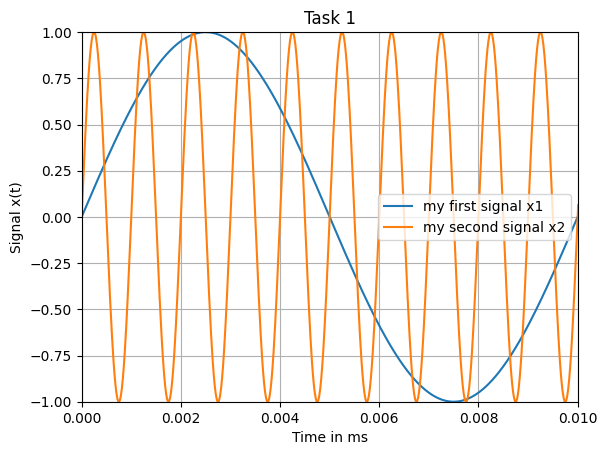

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal 
import sounddevice as sd

# Task 1
#### PARAMETERS ####
T1 = 0.01                                   # unit: s
f2 = 1000                                   # unit: Hz
fs = 44100
t_interval = [0, 5]
start = t_interval[0]
stop = t_interval[1]
increment = 0.00001                         # delta t, unit: s
t = np.arange(start, stop, increment)       # Time vector 't'
t_span = [0, 0.01]                          # unit: s
two_pi = 2 * np.pi

freq_array = np.array([((two_pi * t) / T1), 
                        two_pi * f2 * t])

x1 = np.sin(freq_array[0])                  # Sine signal 1, f = 1 / T1
x2 = np.sin(freq_array[1])                  # Sine signal 2

my_array = np.array([x1, x2])

#### PLOTS ####
# Create a new figure
fig, ax = plt.subplots()

# Plot the curve with x-values 't' and y-values 'x' into
# the figure 'ax' with the legend entry 'My Signal'
plt.title("Task 1")
ax.plot(t, x1, label='my first signal x1')
ax.plot(t, x2, label='my second signal x2')
ax.legend()
ax.set_ylabel("Signal x(t)")
ax.set_xlabel("Time in ms")
ax.set_xlim(t_span)
ax.set_ylim(-1, 1)
ax.grid()
fig.savefig('sine_assignment1.png')

print("Playing x1(t)")
sd.play(x1, 1/increment, blocking=True)
print("Playing x2(t)")
sd.play(x2, 1/increment, blocking=True)

plt.show()

The time where impulse response h(t) peaks: 0.00032


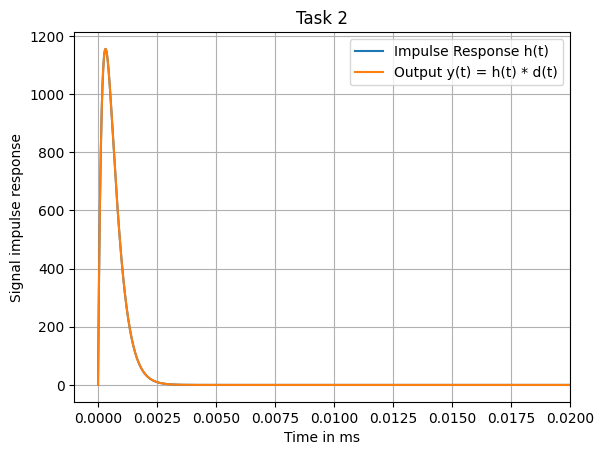

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal 
import sounddevice as sd

increment = 0.00001 

# TASK 2
alpha = 1000 * np.pi
t2_interval = [0, 0.02]                                       # unit: s
start2, stop2 = t2_interval
t2 = np.arange(start2, stop2, increment)

impulse_response = (alpha ** 2) * t2 * np.exp(-alpha * t2)   # u(t) disregarded
impulse_response[t2 < 0] = 0

# Approximation of the Dirac delta function
d = np.zeros(t2.shape)
d[0] = 1 / increment

y = increment * signal.convolve(d, impulse_response, method= 'direct')

start = int(start2 / increment)
stop = int(start2 + d.shape[0])

y = y[start:stop]
y = y[0:d.shape[0]]

fig, ax = plt.subplots()
plt.title("Task 2")
ax.plot(t2, impulse_response, label='Impulse Response h(t)')
ax.plot(t2, y, label='Output y(t) = h(t) * d(t)')
ax.legend()
ax.set_ylabel("Signal impulse response")
ax.set_xlabel("Time in ms")
ax.set_xlim(-0.001, t2_interval[1])
ax.grid()
y_value = np.argmax(impulse_response)
print("The time where impulse response h(t) peaks:", t2[y_value])
fig.savefig('sine_assignment2.png')

The time where impulse response h(t) peaks: 0.00032


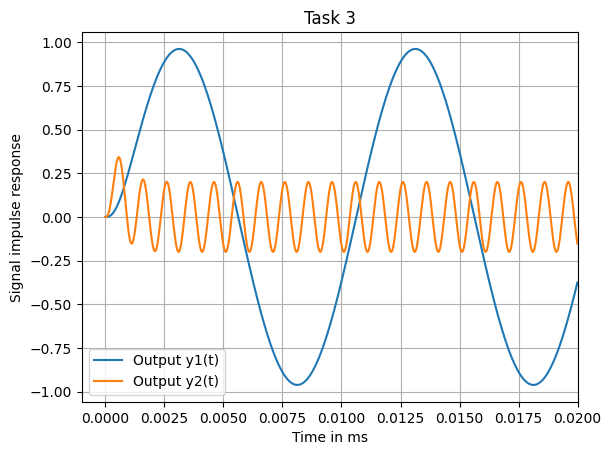

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal 
import sounddevice as sd

# TASK 3
x = [x1, x2]

def integral(x):
    x1, x2 = x
    y1 = increment * signal.convolve(x1, impulse_response, method= 'direct')
    y2 = increment * signal.convolve(x2, impulse_response, method= 'direct')
    return y1,y2

y1, y2 = integral(x)

# Approximation of the Dirac delta function
d = np.zeros(t2.shape)
d[0] = 1 / increment

# Python slicing
start = int(start2 / increment)
stop = int(start + d.shape[0])
y1 = y1[start:stop]
y2 = y2[start:stop]

y1 = y1[0:x1.shape[0]]
y2 = y2[0:x2.shape[0]]

fig, ax = plt.subplots()
plt.title("Task 3")
ax.plot(t2, y1, label='Output y1(t)')
ax.plot(t2, y2, label='Output y2(t)')
ax.legend()
ax.set_ylabel("Signal impulse response")
ax.set_xlabel("Time in ms")
ax.set_xlim(-0.001, t2_interval[1])
ax.grid()
y_value = np.argmax(impulse_response)
print("The time where impulse response h(t) peaks:", t2[y_value])
fig.savefig('sine_assignment3.png')

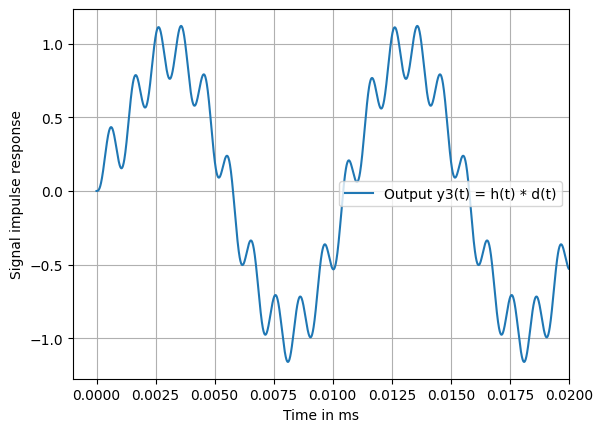

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal 
import sounddevice as sd

freq_array = np.array([((two_pi * t) / T1), 
                        two_pi * f2 * t])

x1 = np.sin(freq_array[0])                  # Sine signal 1, f = 1 / T1
x2 = np.sin(freq_array[1])                  # Sine signal 2

x3 = x1 + x2

y3 = increment * signal.convolve(x3, impulse_response, method= 'direct')

start = int(start2 / increment)
stop = int(start + d.shape[0])

y3 = y3[start:stop]
y3 = y3[0:x3.shape[0]]

fig, ax = plt.subplots()
ax.plot(t2, y3, label='Output y3(t) = h(t) * d(t)')
ax.legend()
ax.set_ylabel("Signal impulse response")
ax.set_xlabel("Time in ms")
ax.set_xlim(-0.001, t2_interval[1])
ax.grid()
fig.savefig('sine_assignment4.png')